In [20]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matyplotlib -rf

Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [21]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [14]:
import seaborn as sns
sns.set_theme(style="whitegrid")


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ---- 안전하게 seaborn 스타일 적용 ----
sns.set_theme(style="whitegrid")

# ---- 파일 경로 설정 ----
BASE = Path.cwd().parents[1] / "python-server" / "app" / "data_pipeline"

features = pd.read_csv(BASE/"features_all.csv", parse_dates=["target_date"])
eval_df = pd.read_csv(BASE/"eval_2025_pred_vs_actual.csv", parse_dates=["target_date"])
pred_future = pd.read_csv(BASE/"predictions.csv", parse_dates=["target_date"])

print("파일 로드 완료")


파일 로드 완료


In [17]:
def MAPE(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100


In [26]:
y = eval_df["y"]
y_pred = eval_df["y_pred"]

mape = MAPE(y, y_pred)
print(f"2025년 전체 MAPE: {mape:.2f}%")


2025년 전체 MAPE: 24.46%


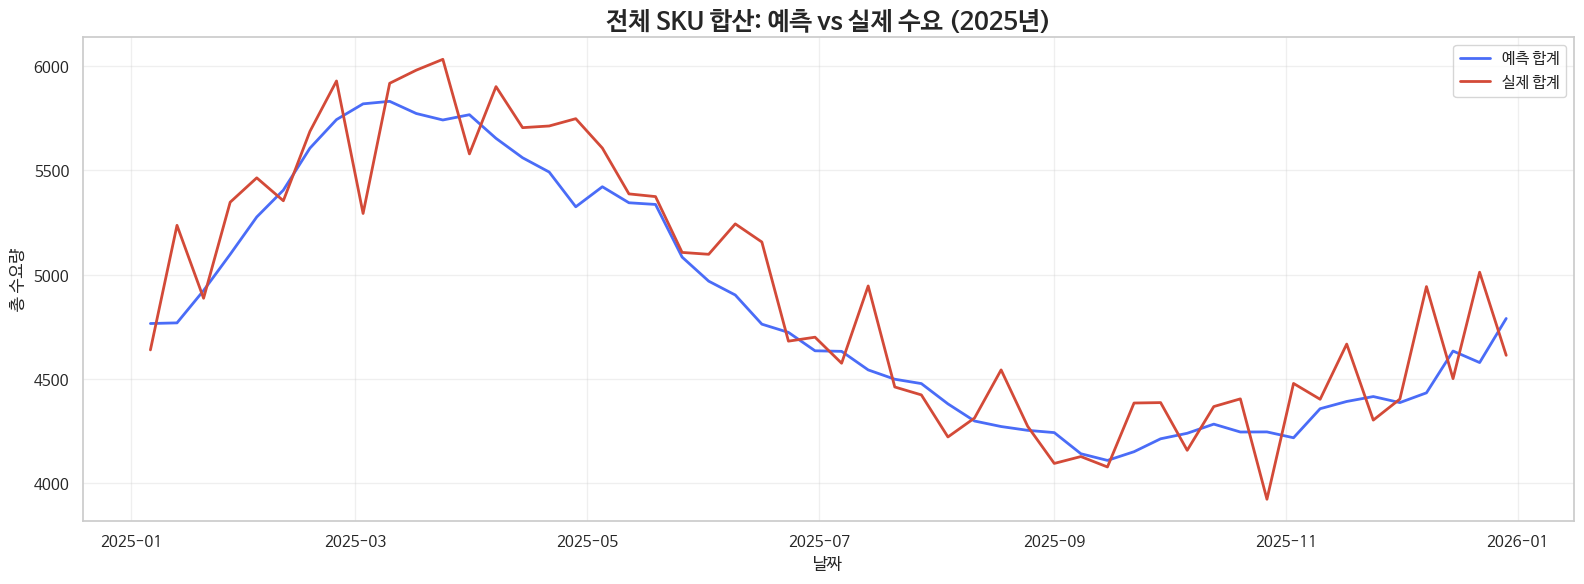

In [27]:
# 날짜별로 모든 SKU의 수요를 합산
daily_sum = eval_df.groupby("target_date")[["y_pred", "y"]].sum().reset_index()

plt.figure(figsize=(16,6))

plt.plot(
    daily_sum["target_date"], 
    daily_sum["y_pred"], 
    label="예측 합계", 
    color="#4A6CF7", 
    linewidth=2
)
plt.plot(
    daily_sum["target_date"], 
    daily_sum["y"], 
    label="실제 합계", 
    color="#D34A38", 
    linewidth=2
)

plt.title("전체 SKU 합산: 예측 vs 실제 수요 (2025년)", fontsize=18, weight="bold")
plt.xlabel("날짜", fontsize=12)
plt.ylabel("총 수요량", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [23]:
# SKU별 카테고리 붙이기
joined = eval_df.merge(
    features[["sku_id", "cat_low"]].drop_duplicates(), 
    on="sku_id", 
    how="left"
)

category_mape = (
    joined.groupby("cat_low")
          .apply(lambda x: MAPE(x["y"], x["y_pred"]))
          .reset_index(name="mape")
          .sort_values("mape")
)

category_mape


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_38356\3784628814.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: MAPE(x["y"], x["y_pred"]))


,cat_low,mape
17,커피머신,10.668805
7,모니터,12.083064
15,전자레인지,12.941084
8,믹서기,13.006681
19,프린터,13.118339
18,토스터기,13.747786
4,노트북,14.018487
12,식기세척기,14.178670
2,공기청정기,15.619025
11,스마트폰,16.292549


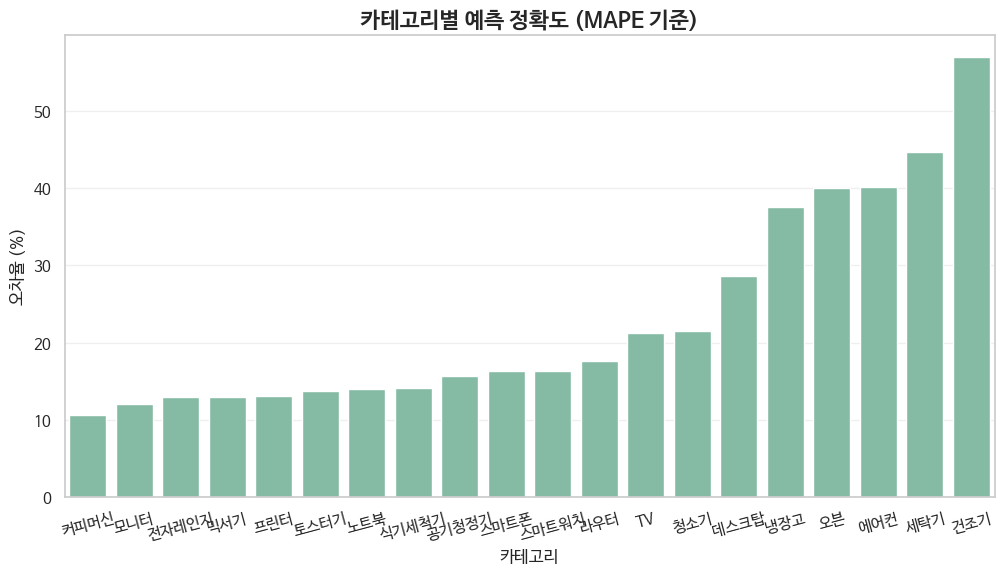

In [24]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=category_mape,
    x="cat_low",
    y="mape",
    color="#7CC4A5"
)

plt.title("카테고리별 예측 정확도 (MAPE 기준)", fontsize=16, weight="bold")
plt.ylabel("오차율 (%)")
plt.xlabel("카테고리")

plt.xticks(rotation=15)
plt.grid(True, axis="y", alpha=0.3)

plt.show()


In [28]:
sku_mape = (
    joined.groupby("sku_id")
          .apply(lambda x: MAPE(x["y"], x["y_pred"]))
          .reset_index(name="mape")
          .sort_values("mape")
)

print("예측이 가장 잘 맞는 SKU TOP 10")
display(sku_mape.head(10))

print("예측이 가장 어려운 SKU TOP 10")
display(sku_mape.tail(10))


예측이 가장 잘 맞는 SKU TOP 10


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_38356\1237077779.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: MAPE(x["y"], x["y_pred"]))


,sku_id,mape
109,110,9.823972
72,73,9.866461
73,74,9.925729
70,71,10.008026
71,72,10.207401
106,107,10.250974
108,109,10.255704
107,108,10.494398
104,105,10.888398
105,106,10.902265


예측이 가장 어려운 SKU TOP 10


,sku_id,mape
93,94,65.291320
43,44,65.299972
52,53,65.463835
49,50,65.467312
44,45,65.625528
45,46,65.640312
53,54,65.812487
47,48,65.835271
51,52,65.854026
50,51,65.973762
